In [3]:
import sys
sys.setrecursionlimit(4000)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 세부사항

- X 데이터와 Y 데이터가 하나의 파일(csv)에 있음
- 학습 데이터와 테스트 데이터의 비율은 80% : 20%
- 모든 데이터(컬럼,로우)를 학습에 사용할 필요는 없습니다.
- 실제 모델 결과보다 모델을 만들기까지의 과정이 중요합니다.
- 어떠한 논리로 분석을 진행하였는지 설명을 세부적으로 적어주시길 바랍니다.
- 머신러닝을 사용한 모델링 과정을 하나 이상 넣어 주시길 바랍니다.

# 차량 이미지 데이터 (Classification)

국내 차량 이미지 데이터를 보고 차량 클래스를 구분하는 모델을 만드시오.총 24,916개의 국산 차량 이미지 데이터가 있다.

활용 예: CCTV나 자율주행차 개발에서 주위 차량 Detection 모델

이미지는 30 x 30 x 3 짜리 이미지 가 픽셀 값으로 들어가 있고 마지막 컬럼에는 해당 차량의 클래스가 들어가 있다.

파일명 : kcar.pkl (압축 형식 : Gzip)

https://www.aihub.or.kr/aidata/130

평가 지표 : Accuracy

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
train = pd.read_pickle("/content/drive/MyDrive/잭상/kcar.pkl", compression='gzip')
train.shape

(24916, 2701)

In [18]:
train = train.sample(n=3000,random_state=1234)

In [19]:
train.shape

(3000, 2701)

In [20]:
train.head() # 2700개의 픽셀과 1개의 라벨

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
7461,115,130,111,125,140,121,208,223,204,136,151,132,124,139,120,128,143,124,127,140,122,123,136,118,124,137,119,114,127,109,85,96,79,66,77,60,84,95,78,107,...,170,175,171,167,172,168,168,173,169,173,175,172,174,176,173,173,173,171,170,170,168,169,168,166,171,170,168,174,173,171,178,177,175,182,178,177,183,179,178,맥스크루즈
24837,114,104,55,103,93,44,91,80,35,82,70,28,76,67,26,77,67,31,86,78,42,97,88,55,167,160,131,129,122,93,97,92,63,96,91,62,100,96,67,90,...,152,154,153,154,156,155,156,158,157,157,157,159,155,155,157,153,153,155,152,152,154,159,159,159,152,152,152,148,146,147,149,147,148,149,148,146,148,147,145,팰리세이드
3667,50,61,63,59,70,72,64,75,77,71,82,84,80,90,91,75,85,86,71,80,79,80,89,88,51,57,55,68,74,72,88,93,89,66,71,67,84,86,81,93,...,174,167,159,121,114,106,117,110,102,131,126,120,128,123,117,126,123,118,118,115,110,123,122,118,123,122,118,122,122,120,122,122,120,121,121,119,120,120,118,그랜저 IG
24383,17,34,44,23,40,50,25,42,50,24,41,49,31,46,53,40,55,62,44,59,66,42,57,64,55,68,76,66,79,87,73,85,97,69,81,93,62,74,90,56,...,24,29,35,26,31,35,28,34,34,33,37,38,34,38,39,28,32,35,19,22,29,24,27,36,20,22,34,26,28,40,22,25,32,80,84,87,124,128,127,팰리세이드
8071,81,106,87,126,151,132,134,157,139,134,157,139,139,160,143,142,163,146,151,170,151,137,156,137,138,155,136,121,138,119,149,164,145,98,113,94,94,107,87,127,...,171,176,172,171,176,172,172,177,173,176,178,173,178,180,175,180,181,176,181,182,177,180,181,175,179,180,174,178,177,172,176,175,170,175,175,167,174,174,166,벨로스터


In [21]:
# X와 y로 나누기
# X는 한 픽셀을 Feature로 잡은 것 입니다.
# y는 label입니다. 
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X.shape, y.shape

((3000, 2700), (3000,))

In [22]:
y.values

array(['맥스크루즈', '팰리세이드', '그랜저 IG', ..., '소나타 하이브리드', '싼타페', '소나타 NF'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y['code'] = LE.fit_transform(y.values)
y['code']

array([ 9, 33,  5, ..., 17, 19, 14])

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y['code'].reshape(-1,1))
new_y = enc.transform(y['code'].reshape(-1,1)).toarray()
new_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

소나타 NF


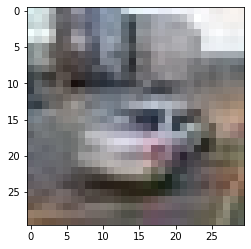

In [30]:
# 0번째 label 및 이미지 확인
print(y.iloc[0])
plt.imshow(X.iloc[0].values.astype(np.int).reshape(30,30,3)) # (32,32,3)으로 변환

맥스크루즈


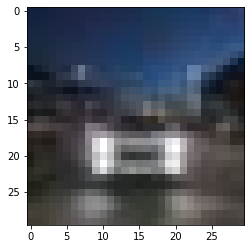

In [31]:
# 200번째 label 및 이미지 확인
print(y.iloc[200])
plt.imshow(X.iloc[200].values.astype(np.int).reshape(30,30,3))

i30


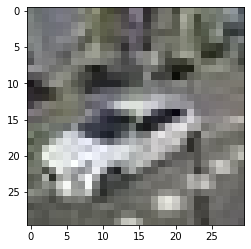

In [32]:
# 400번째 label 및 이미지 확인
print(y.iloc[400])
plt.imshow(X.iloc[400].values.astype(np.int).reshape(30,30,3))

In [25]:
y = y['code']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 2700), (600, 2700), (2400,), (600,))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc4a732c18>]],
      dtype=object)

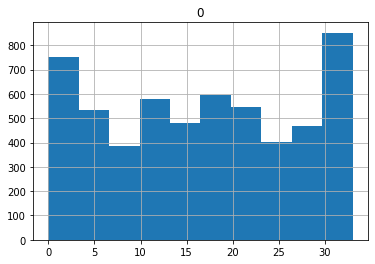

In [86]:
pd.DataFrame(y_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc4a719898>]],
      dtype=object)

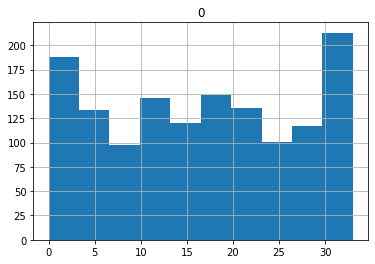

In [87]:
pd.DataFrame(y_test).hist()

In [51]:
# 샘플 모델 3개 : Logistic Regression, SVC, Perceptron
def RunModel(model, X_train, y_train, X_test, y_test):
    clf = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return clf, pred

lr = LogisticRegression()
clf, y_pred = RunModel(lr, X_train, y_train, X_test, y_test)

# svc = SVC()
# clf_svc, y_pred_svc = RunModel(svc, X_train, y_train, X_test, y_test)

# perc = Perceptron(tol=1e-3, random_state=0)
# clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# y_test = le.inverse_transform(y_test)
# y_pred = le.inverse_transform(y_pred)
# y_pred_svc = le.inverse_transform(y_pred_svc)
# y_pred_perc = le.inverse_transform(y_pred_perc)

In [54]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("SVC Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
# print("Perceptron Accuracy:", metrics.accuracy_score(y_test, y_pred_perc))

Accuracy: 0.17937399678972712


정답: ['아이오닉 하이브리드']
모델 결과: ['G90']


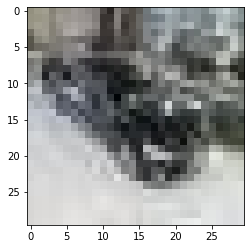

In [55]:
import random
t = random.randint(0, len(X_test)-1)
# 0번째 테스트 label 및 이미지 확인
print("정답:", le.inverse_transform([y_test[0]]))
print("모델 결과:", le.inverse_transform([y_pred[0]]))
# print("SVC 모델 결과:", y_pred_svc[0])
# print("Perceptron 모델 결과:", y_pred_perc[0])
plt.imshow(X_test.iloc[0].values.astype(np.int).reshape(30,30,3)) # (32,32,3)으로 변환

머신러닝 과정

In [27]:
import lightgbm as lgb

In [28]:
X1_train = X_train.astype(int) #int로 변환

In [29]:
X1_test = X_test.astype(int)

In [30]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [45]:
clf = DecisionTreeClassifier()
clf.fit(X1_train, y_train)
y_pred = clf.predict(X1_test)
accuracy_score(y_test, y_pred)

0.10333333333333333

In [71]:
clf = RandomForestClassifier(n_estimators=10, max_features="auto",random_state=11)
clf.fit(X1_train, y_train)
y_pred = clf.predict(X1_test)
accuracy_score(y_test, y_pred)

0.14166666666666666

In [47]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X1_train, y_train)
y_pred = clf.predict(X1_test)
accuracy_score(y_test, y_pred)

0.075

In [ ]:
#LIGHT, GRADIENT는 시간 부족으로 인해 생략했습니다

In [65]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [100, 200],
           'max_depth' : [10, 12],
           'min_samples_leaf' : [6, 8],
           'min_samples_split' : [8, 10]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X1_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 예측 정확도: 0.1829


In [66]:
y_pred = grid_cv.predict(X1_test)
accuracy_score(y_test, y_pred)

0.19